In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
x,x_time,y,y_time = [],[],[],[]

In [6]:
import os

path = "TrainingData"

files = os.listdir(path)

x_csv = []
x_time_csv = []
y_csv = []
y_time_csv = []

for file in files:
    if file.endswith("_x.csv"):
        x_csv.append(pd.read_csv(path+"/"+file,header = None))
    elif file.endswith("_x_time.csv"):
        x_time_csv.append(pd.read_csv(path+"/"+file,header = None))
    elif file.endswith("_y.csv"):
        y_csv.append(pd.read_csv(path+"/"+file,header = None))
    elif file.endswith("_y_time.csv"):
        y_time_csv.append(pd.read_csv(path+"/"+file,header = None))


In [15]:
# for i in range(29):
#     print(x_time_csv[i].iloc[1],y_time_csv[i].iloc[1])

In [9]:
for i in range(29):
    print(len(x_csv[i]),4*len(y_csv[i]))

37890 37892
70172 70172
43146 43148
54956 54956
59121 59120
38631 38632
31423 31424
66762 66764
55999 56000
55401 55400
48797 48796
51461 51460
42319 42320
36313 36312
47210 47212
19533 19532
34309 34308
34476 34476
56079 56080
34519 34520
44905 44904
48125 48124
59562 59564
45129 45128
46201 46200
46989 46988
44641 44640
39439 39440
48138 48140


In [16]:
l = []
for j in range(29):
    new_list = []
    for i in (y_csv[j].T).values.tolist()[0]:
        new_list.extend([i]*4)
    l.append(pd.DataFrame(new_list))


y_csv = l
l = []
for j in range(29):
    new_list = []
    for i in (y_time_csv[j].T).values.tolist()[0]:
        new_list.extend([i]*4)
    l.append(pd.DataFrame(new_list))
y_time_csv = l


In [18]:
for i in range(29):
    print(len(x_csv[i]),len(y_csv[i]))

37890 37892
70172 70172
43146 43148
54956 54956
59121 59120
38631 38632
31423 31424
66762 66764
55999 56000
55401 55400
48797 48796
51461 51460
42319 42320
36313 36312
47210 47212
19533 19532
34309 34308
34476 34476
56079 56080
34519 34520
44905 44904
48125 48124
59562 59564
45129 45128
46201 46200
46989 46988
44641 44640
39439 39440
48138 48140


In [20]:
for i in range(29):
    if len(x_csv[i])>len(y_csv[i]):
        x_csv[i] = x_csv[i].drop(x_csv[i].iloc[-(len(x_csv[i])-len(y_csv[i])):].index)
        x_time_csv[i] = x_time_csv[i].drop(x_time_csv[i].iloc[-(len(x_time_csv[i])-len(y_csv[i])):].index)
    elif len(x_csv[i])<len(y_csv[i]):
        y_csv[i] = y_csv[i].drop(y_csv[i].iloc[-(len(y_csv[i])-len(x_csv[i])):].index)
        y_time_csv[i] = y_time_csv[i].drop(y_time_csv[i].iloc[-(len(y_time_csv[i])-len(x_csv[i])):].index)
    


In [21]:
for i in range(29):
    print(len(x_csv[i]),len(y_csv[i]))

37890 37890
70172 70172
43146 43146
54956 54956
59120 59120
38631 38631
31423 31423
66762 66762
55999 55999
55400 55400
48796 48796
51460 51460
42319 42319
36312 36312
47210 47210
19532 19532
34308 34308
34476 34476
56079 56079
34519 34519
44904 44904
48124 48124
59562 59562
45128 45128
46200 46200
46988 46988
44640 44640
39439 39439
48138 48138


In [22]:
# x_csv = pd.concat(x_csv)
# x_time_csv = pd.concat(x_time_csv)
# y_csv = pd.concat(y_csv)
# y_time_csv = pd.concat(y_time_csv)
for df in x_csv:
    df.set_axis(["1","2","3","4","5","6"], axis=1, inplace=True)
x = pd.concat(x_csv).reset_index(drop=True)


In [23]:
for df in x_time_csv:
    df.set_axis(["7"], axis=1, inplace=True)
x_time_csv
x_time_csv = pd.concat(x_time_csv).reset_index(drop=True)
x['7'] = x_time_csv

In [24]:
for df in y_csv:
    df.set_axis(["Y"], axis=1, inplace=True)
y = pd.concat(y_csv).reset_index(drop=True)

In [25]:
x,y

(                1         2         3         4         5         6         7
 0        4.435275  8.196063  2.974488  0.014215 -0.039157 -0.016744     0.000
 1        4.186920  8.344455  2.908057  0.005771 -0.004480 -0.003345     0.025
 2        4.544637  8.408659  2.890000  0.007967  0.022412  0.001159     0.050
 3        4.849308  8.411614  2.900692  0.027778 -0.010670 -0.014223     0.075
 4        4.509190  8.118649  2.847298  0.021577 -0.045498 -0.021111     0.100
 ...           ...       ...       ...       ...       ...       ...       ...
 1341628  2.072244  8.908878 -3.500000  0.001351  0.001191  0.001031  1203.325
 1341629  2.085123  8.915123 -3.520000  0.001918 -0.001147  0.000000  1203.350
 1341630  2.083774  8.910000 -3.538981 -0.002015 -0.004099  0.001042  1203.375
 1341631  2.111447  8.908553 -3.535724  0.000183 -0.001673  0.001856  1203.400
 1341632  2.087730  8.900000 -3.518865  0.000052 -0.001267  0.000000  1203.425
 
 [1341633 rows x 7 columns],
          Y
 0       

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [28]:
x

array([[ 6.63865175e-01,  2.36377136e-02, -5.55171281e-01, ...,
        -4.04391253e-02,  6.60469158e-02, -1.59037458e+00],
       [ 6.20544908e-01,  4.52871459e-02, -5.67085160e-01, ...,
        -1.82720185e-02,  8.34568144e-02, -1.59030938e+00],
       [ 6.82941059e-01,  5.46540939e-02, -5.70323541e-01, ...,
        -1.08201851e-03,  8.93083295e-02, -1.59024418e+00],
       ...,
       [ 2.53695656e-01,  1.27796501e-01, -1.72331088e+00, ...,
        -1.80290443e-02,  8.91570716e-02,  1.54795127e+00],
       [ 2.58522624e-01,  1.27585393e-01, -1.72272676e+00, ...,
        -1.64778319e-02,  9.02144711e-02,  1.54801647e+00],
       [ 2.54385696e-01,  1.26337565e-01, -1.71970323e+00, ...,
        -1.62182484e-02,  8.78030474e-02,  1.54808167e+00]])

In [29]:
x = pd.DataFrame(x,columns = ["1","2","3","4","5","6","7"])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x['y'] = y

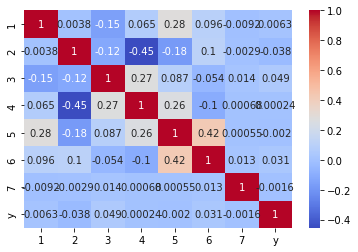

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample correlation matrix
corr_matrix = x.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [33]:
X_train, X_test, y_train, y_test= train_test_split(x.drop('y',axis=1), x['y'], test_size=0.3, random_state=42, stratify=x['y'])

In [34]:
X_train

,1,2,3,4,5,6,7
1156116,-1.553437,0.098756,0.941791,-0.344451,-1.432354,-0.726017,1.010260
594649,-1.203220,-0.534094,1.046270,-1.129342,-0.072229,-2.214130,0.519055
317040,-0.135744,0.160393,-0.804032,-0.370390,-0.702542,-0.099417,-0.734645
278333,-0.672763,0.205176,1.016480,2.342770,-0.257696,1.063109,-0.739600
502861,0.086275,0.254561,-0.626129,-0.247247,-0.630784,-0.650172,1.328037
...,...,...,...,...,...,...,...
221573,-0.058625,0.407183,-0.827346,-0.738916,-0.244306,0.517672,-0.585732
304715,0.039690,0.191488,-0.621529,-0.005732,-0.008512,0.090738,-1.538216
1003598,0.182935,0.275780,-0.230609,-0.244718,1.734629,0.570014,1.029559
801903,0.059017,0.095911,-0.322129,-0.145434,0.269568,0.152601,-1.038340


In [35]:
y_train

1156116    1
594649     0
317040     0
278333     0
502861     0
          ..
221573     0
304715     0
1003598    0
801903     0
899159     0
Name: y, Length: 939143, dtype: int64

In [36]:
X_test

,1,2,3,4,5,6,7
531025,-1.367140,0.215249,-0.131842,-0.158314,-0.757754,-0.662544,-0.447707
956756,-1.049560,-2.165980,-0.906138,-0.492988,1.348440,0.348903,0.903204
1151938,-1.727342,-1.354673,1.624437,-0.902037,0.127012,1.317303,0.737861
1185714,2.170997,-0.235419,0.703350,0.119138,-0.007410,-0.789807,-0.072164
192836,0.133822,-0.088181,1.178429,-0.853794,-0.359526,0.536088,1.123705
...,...,...,...,...,...,...,...
708124,-0.159482,0.132334,-0.420171,0.007761,0.052915,0.148002,-0.564282
304664,0.213043,0.176879,-0.582749,-0.056528,0.103784,0.319334,-1.541541
319799,0.010141,0.509603,0.855441,-0.380985,0.334385,-0.223330,-0.554763
1034456,0.101793,0.435253,0.384814,-0.535668,-1.721168,-1.261920,-0.096157


In [37]:
y_test

531025     3
956756     3
1151938    0
1185714    0
192836     2
          ..
708124     0
304664     0
319799     0
1034456    0
730147     0
Name: y, Length: 402490, dtype: int64

In [38]:
X_train.shape

(939143, 7)

In [39]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [29]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D

# # Define the input shape
# input_shape = (7, 1)

# # Define the number of classes
# num_classes = 4

# # Create the model
# model = Sequential()

# # Add a convolutional layer with 32 filters, a kernel size of 3, and a relu activation
# model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))

# # Add a max pooling layer with a pool size of 2
# model.add(MaxPooling1D(pool_size=2))

# # Add a dropout layer to prevent overfitting
# model.add(Dropout(0.25))

# # Add a flatten layer to convert the output to a 1D vector
# model.add(Flatten())

# # Add a dense layer with 128 neurons and a relu activation
# model.add(Dense(128, activation='relu'))

# # Add a dropout layer to prevent overfitting
# model.add(Dropout(0.5))

# # Add the output layer with num_classes neurons and a softmax activation
# model.add(Dense(num_classes, activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model on the training data
# model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
8385/8385 [==============================] - 50s 6ms/step - loss: 0.7202 - accuracy: 0.7540 - val_loss: 0.6660 - val_accuracy: 0.7615
Epoch 2/10
8385/8385 [==============================] - 59s 7ms/step - loss: 0.6839 - accuracy: 0.7595 - val_loss: 0.6509 - val_accuracy: 0.7637
Epoch 3/10
8385/8385 [==============================] - 48s 6ms/step - loss: 0.6759 - accuracy: 0.7613 - val_loss: 0.6425 - val_accuracy: 0.7664
Epoch 4/10
8385/8385 [==============================] - 46s 5ms/step - loss: 0.6730 - accuracy: 0.7619 - val_loss: 0.6395 - val_accuracy: 0.7675
Epoch 5/10
8385/8385 [==============================] - 51s 6ms/step - loss: 0.6706 - accuracy: 0.7623 - val_loss: 0.6390 - val_accuracy: 0.7672
Epoch 6/10
8385/8385 [==============================] - 53s 6ms/step - loss: 0.6696 - accuracy: 0.7628 - val_loss: 0.6373 - val_accuracy: 0.7680
Epoch 7/10
8385/8385 [==============================] - 50s 6ms/step - loss: 0.6679 - accuracy: 0.7632 - val_loss: 0.6343 - val_ac

In [41]:
x.shape

(1341633, 8)

In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical
import numpy as np

model = Sequential()
model.add(LSTM(units=64, input_shape=(7,1)))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
29349/29349 [==============================] - 334s 11ms/step - loss: 0.6464 - accuracy: 0.7678 - val_loss: 0.5794 - val_accuracy: 0.7809
Epoch 2/10
29349/29349 [==============================] - 209s 7ms/step - loss: 0.5760 - accuracy: 0.7822 - val_loss: 0.5518 - val_accuracy: 0.7874
Epoch 3/10
29349/29349 [==============================] - 131s 4ms/step - loss: 0.5557 - accuracy: 0.7873 - val_loss: 0.5369 - val_accuracy: 0.7925
Epoch 4/10
29349/29349 [==============================] - 191s 7ms/step - loss: 0.5434 - accuracy: 0.7908 - val_loss: 0.5308 - val_accuracy: 0.7937
Epoch 5/10
29349/29349 [==============================] - 196s 7ms/step - loss: 0.5363 - accuracy: 0.7928 - val_loss: 0.5213 - val_accuracy: 0.7967
Epoch 6/10
29349/29349 [==============================] - 189s 6ms/step - loss: 0.5308 - accuracy: 0.7943 - val_loss: 0.5193 - val_accuracy: 0.7976
Epoch 7/10
29349/29349 [==============================] - 202s 7ms/step - loss: 0.5263 - accuracy: 0.7960 - val

In [44]:
model.save("Models/lstm.h5")